# Question for this notebook- Find various SKU's that have seasonal purchasing patterns, try to identify reasons for seasonal changes.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [4]:
baskets = pd.read_csv('baskets_sample_random_10.csv')

#### Implement Dr. Li's date configuration for ease of time access.

In [5]:
baskets['datetime'] = baskets['placed_at'].apply(lambda x: datetime.fromisoformat(x))

#pandas.Series.dt is an interface on a pandas series that gives you convenient access to operations on data stored as a pandas datetime. 
baskets['date'] = baskets['datetime'].dt.date
baskets['year'] = baskets['datetime'].dt.year
baskets['month'] = baskets['datetime'].dt.month
baskets['day'] = baskets['datetime'].dt.day
baskets['hour'] = baskets['datetime'].dt.hour
baskets['weekday'] = baskets['datetime'].dt.weekday

In [6]:
baskets.head(5)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
0,126,23,2021-05-05 11:04:46.579,10,341,3.0,47.0,100,0.0,2021-05-05 11:04:46.579,2021-05-05,2021,5,5,11,2
1,166,41,2021-05-06 10:45:02.448,196,341,3.0,47.0,2,0.0,2021-05-06 10:45:02.448,2021-05-06,2021,5,6,10,3
2,167,42,2021-05-06 10:45:04.850,196,341,3.0,47.0,2,0.0,2021-05-06 10:45:04.850,2021-05-06,2021,5,6,10,3
3,168,43,2021-05-06 10:48:00.927,197,457,12.0,30.0,20,0.0,2021-05-06 10:48:00.927,2021-05-06,2021,5,6,10,3
4,169,44,2021-05-06 10:51:28.980,198,341,3.0,47.0,5,0.0,2021-05-06 10:51:28.980,2021-05-06,2021,5,6,10,3


#### Try to make algorithm that plots all purchases over months for random SKU (year doesn't matter right now)

In [7]:
randsku = baskets[baskets['sku_id']==962]
randsku.head(5)

,id,order_id,placed_at,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,datetime,date,year,month,day,hour,weekday
132,2207,356,2021-06-17 10:27:52.447,349,962,3.0,105.0,10,147000.0,2021-06-17 10:27:52.447,2021-06-17,2021,6,17,10,3
202,3051,417,2021-06-25 00:43:08.986,134,962,3.0,105.0,15,150000.0,2021-06-25 00:43:08.986,2021-06-25,2021,6,25,0,4
210,3357,431,2021-06-25 15:21:54.917,134,962,3.0,105.0,4,150000.0,2021-06-25 15:21:54.917,2021-06-25,2021,6,25,15,4
228,3422,434,2021-06-25 15:37:06.159,134,962,3.0,105.0,20,150000.0,2021-06-25 15:37:06.159,2021-06-25,2021,6,25,15,4
236,3430,435,2021-06-25 15:43:51.317,10,962,3.0,105.0,50,150000.0,2021-06-25 15:43:51.317,2021-06-25,2021,6,25,15,4


## Both attempts seem to generate same plot

<AxesSubplot:xlabel='month'>

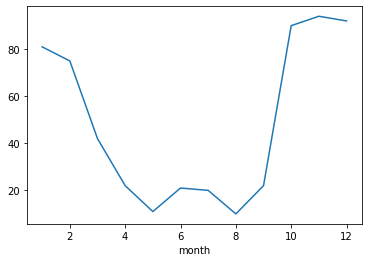

In [8]:
randsku['sku_id'].groupby(randsku['month']).count().plot()

#### df.groupby('Company Name')['PaidTotal'].sum().plot.bar() - second attempt to count how many oders per month were placed of this specific product.

<AxesSubplot:xlabel='month'>

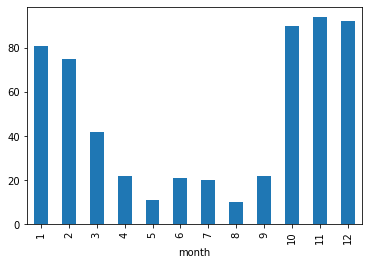

In [9]:
randsku.groupby('month')['order_id'].count().plot.bar()

## Next, find top 5 sku's and plot all purchases to observe seasonal changes.

Does purchasing in general follow a seasonal patterm? Make sure to only observe sku's that deviate from the average season buying, since this pattern may simply be a normal yearly variance.

In [27]:
baskets.groupby(['sku_id']).order_id.nunique().sort_values(ascending = False)

sku_id
962     580
761     577
824     519
875     479
696     454
       ... 
1446      1
1445      1
1442      1
1440      1
2383      1
Name: order_id, Length: 1353, dtype: int64

#### Top 5 are sku's 962, 761, 824, 875, 696. What items are these? Are they seasonaly demanded? 

Let's graph all of them. First, make a subdataframe with the top 5 skus in it. 

In [11]:
options = [962, 761, 824, 875, 696]
topsku = baskets[baskets['sku_id'].isin(options)]
topsku.describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,year,month,day,hour,weekday
count,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000,2612.000000
mean,162978.266845,27311.173813,1057.918070,827.830781,5.803599,61.722435,23.568147,203574.779807,2021.495023,6.726646,16.432236,12.920368,2.635911
std,89664.085063,17457.113727,739.765314,91.754082,4.387504,29.398839,118.881750,184865.886690,0.500071,4.153085,8.879184,3.755116,1.780437
min,2207.000000,356.000000,10.000000,696.000000,3.000000,24.000000,1.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,85322.750000,11259.000000,398.000000,761.000000,3.000000,37.000000,1.000000,118000.000000,2021.000000,2.000000,8.000000,10.000000,1.000000
50%,161664.500000,26410.000000,946.000000,824.000000,4.000000,57.000000,3.000000,159500.000000,2021.000000,7.000000,17.000000,12.000000,3.000000
75%,238108.750000,42896.500000,1497.000000,875.000000,4.000000,80.000000,16.000000,210625.000000,2022.000000,11.000000,24.000000,15.000000,4.000000
max,338865.000000,61356.000000,3160.000000,962.000000,14.000000,105.000000,5000.000000,650000.000000,2022.000000,12.000000,31.000000,23.000000,6.000000


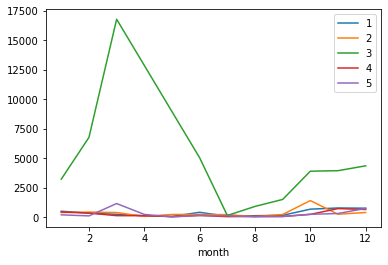

In [34]:
for i in range(5):
    topsku[topsku['sku_id']==options[i]].groupby('month')['qty'].sum().plot().legend([1,2,3,4,5],fancybox = True)


#### What I notice: Why is SKU 824 so significant?

In [35]:
baskets[baskets['sku_id']== 824].describe()

,id,order_id,merchant_id,sku_id,top_cat_id,sub_cat_id,qty,price,year,month,day,hour,weekday
count,522.000000,522.000000,522.000000,522.0,522.0,522.0,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,173049.425287,29613.902299,1005.532567,824.0,4.0,57.0,89.139847,15900.957854,2021.599617,5.590038,17.296935,13.396552,2.770115
std,83020.071234,16418.503990,781.481989,0.0,0.0,0.0,249.656289,2012.055567,0.490446,4.066687,8.835778,4.215617,1.787359
min,2585.000000,390.000000,10.000000,824.0,4.0,57.0,1.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000
25%,94886.500000,12944.750000,352.000000,824.0,4.0,57.0,32.000000,14350.000000,2021.000000,2.000000,9.000000,10.000000,1.000000
50%,200179.000000,34627.500000,644.000000,824.0,4.0,57.0,48.000000,16500.000000,2022.000000,3.000000,19.000000,13.000000,3.000000
75%,251044.750000,45037.000000,1436.000000,824.0,4.0,57.0,96.000000,17650.000000,2022.000000,10.000000,25.000000,16.000000,4.000000
max,267422.000000,49098.000000,2777.000000,824.0,4.0,57.0,5000.000000,18800.000000,2022.000000,12.000000,31.000000,23.000000,6.000000
